In [21]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [22]:
citynamelist=["bj","sh","gz","sz","zz"]
citynamelist_chinese=["北京","上海","广州","深圳","郑州"]
df_list=[]


In [23]:
result={}
for i in range(len(citynamelist)):
    filename=citynamelist[i]+"2.csv"
    """name_chinese,block,house_type,direct,area,price"""
    df = pd.read_csv(filename, encoding='utf-8-sig')
    df = df.drop_duplicates()  # 去重
    df = df.dropna()  # 去空值
    #输出数据数量
    print(citynamelist_chinese[i]+"的数据数量为：",len(df))
    df_list.append(df)
    


北京的数据数量为： 36478
上海的数据数量为： 27000
广州的数据数量为： 51413
深圳的数据数量为： 21303
郑州的数据数量为： 21796


In [24]:
#统计每个城市每个block的均价
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    df=df_list[i]
    block_list=df["block"].unique()
    block_price_list=[]
    for block in block_list:
        block_price_list.append(df[df["block"]==block]["price"].mean())
    result[cityname]=block_price_list

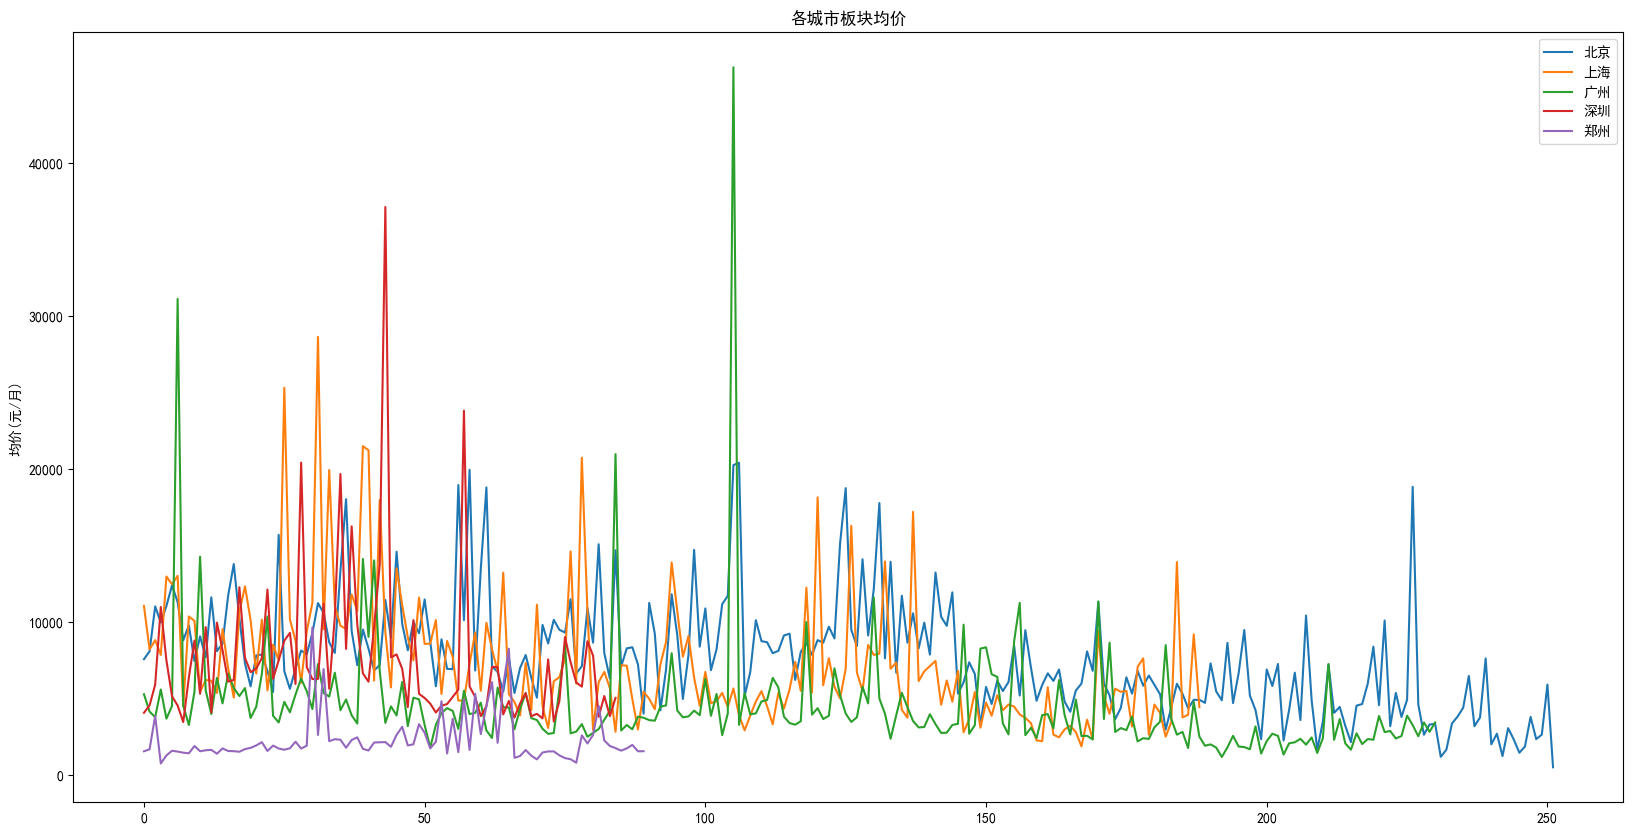

In [25]:
#画图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,10))
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    plt.plot(result[cityname],label=citynamelist_chinese[i])
plt.title("各城市板块均价")
plt.ylabel("均价(元/月)")
plt.legend()


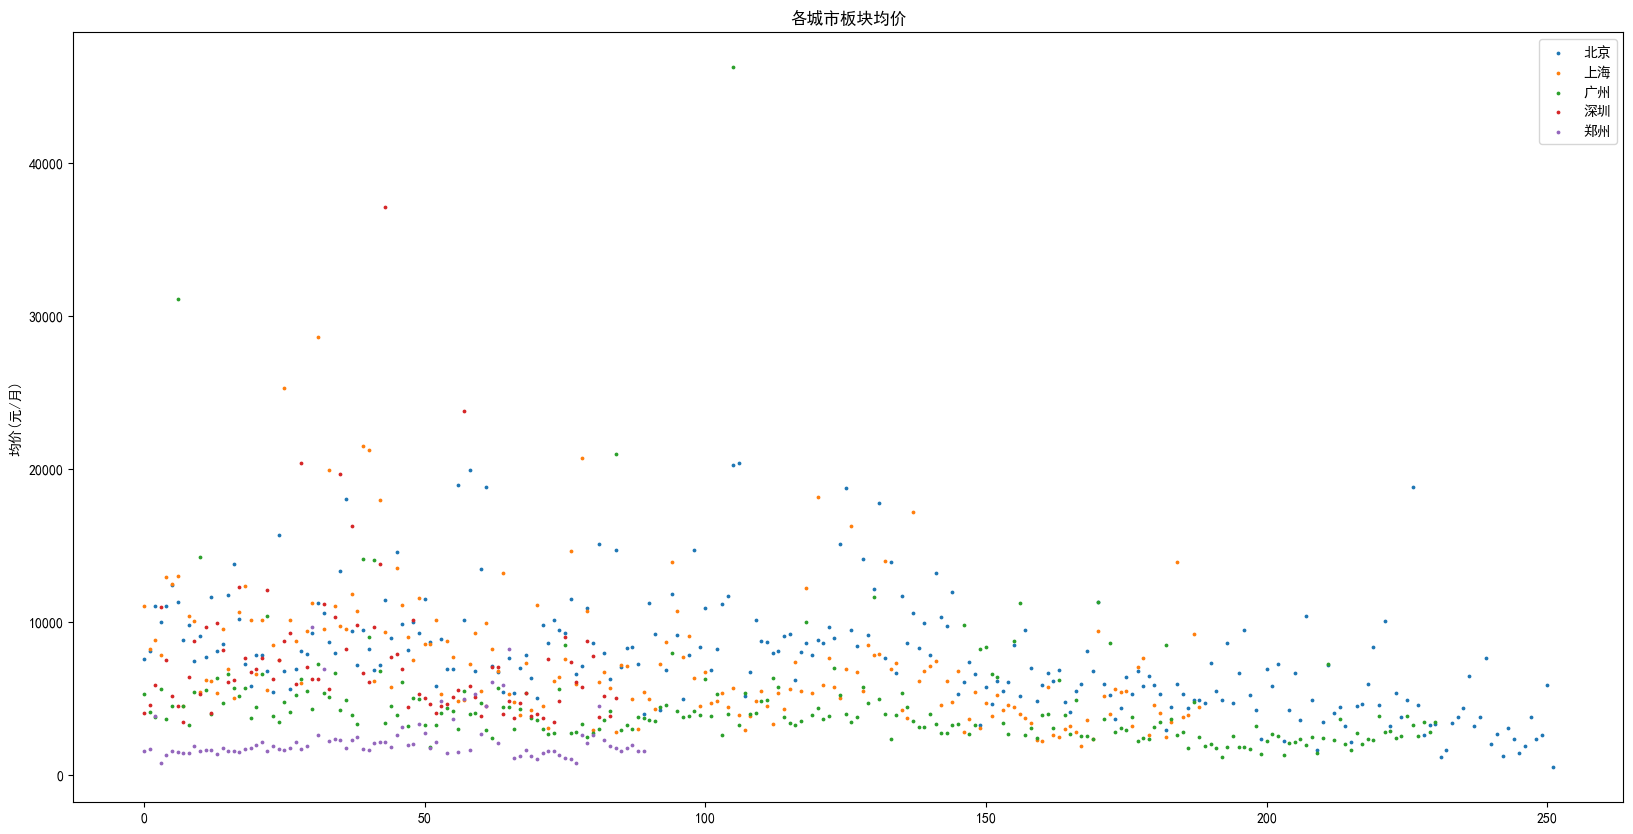

In [26]:

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,10))
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    plt.scatter(range(len(result[cityname])),result[cityname],label=citynamelist_chinese[i],s=3)
plt.title("各城市板块均价")
plt.ylabel("均价(元/月)")
plt.legend()


In [27]:
for i in range(len(citynamelist)):
    result[citynamelist[i]]=sorted(result[citynamelist[i]])

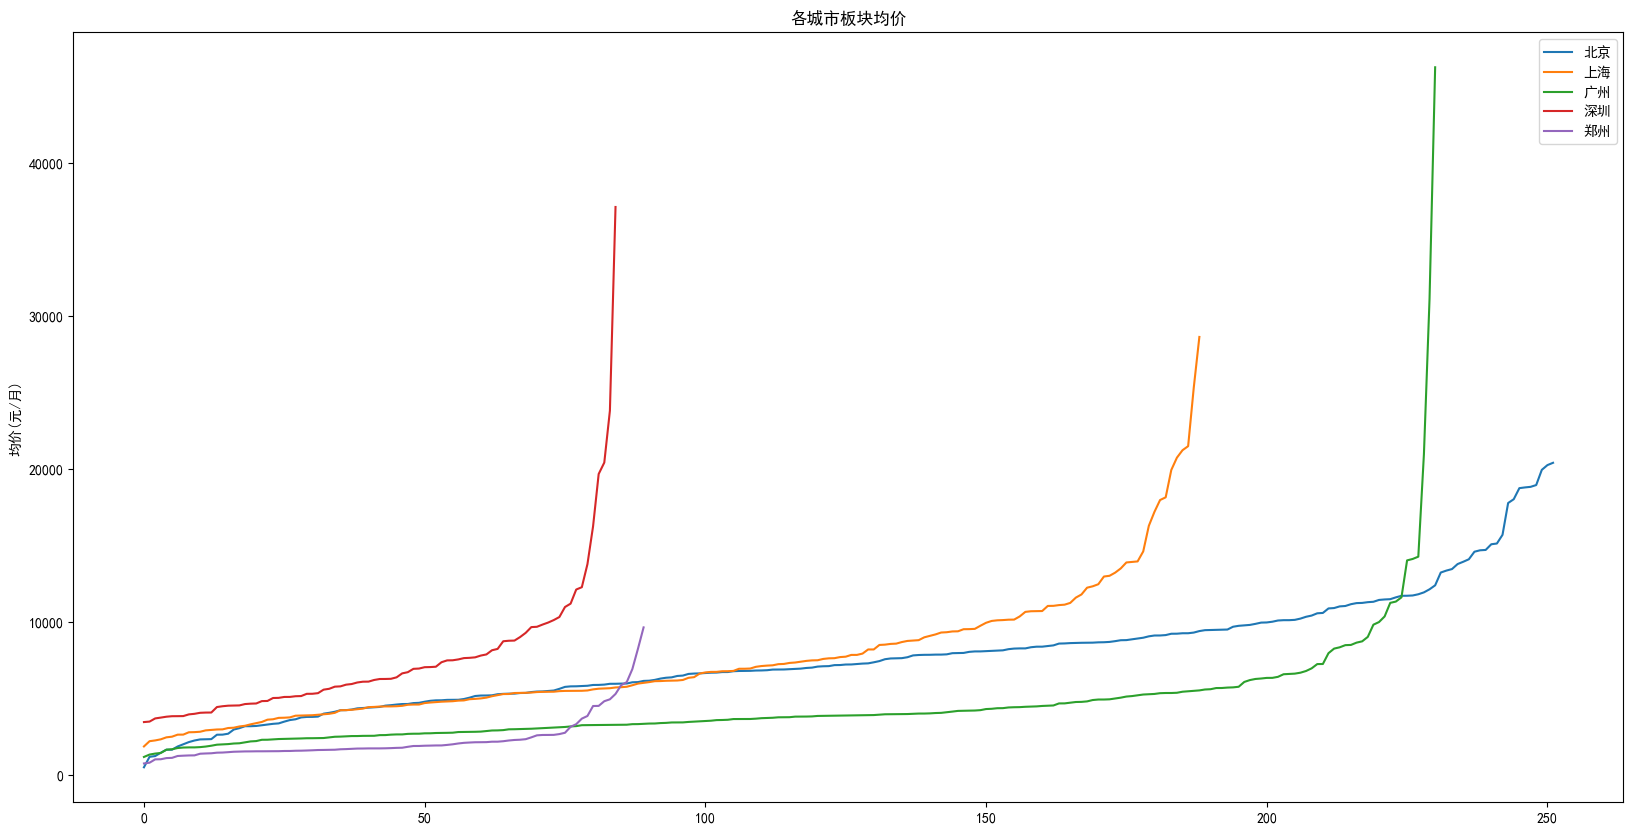

In [28]:

#画图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,10))
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    plt.plot(result[cityname],label=citynamelist_chinese[i])
plt.title("各城市板块均价")
plt.ylabel("均价(元/月)")
plt.legend()


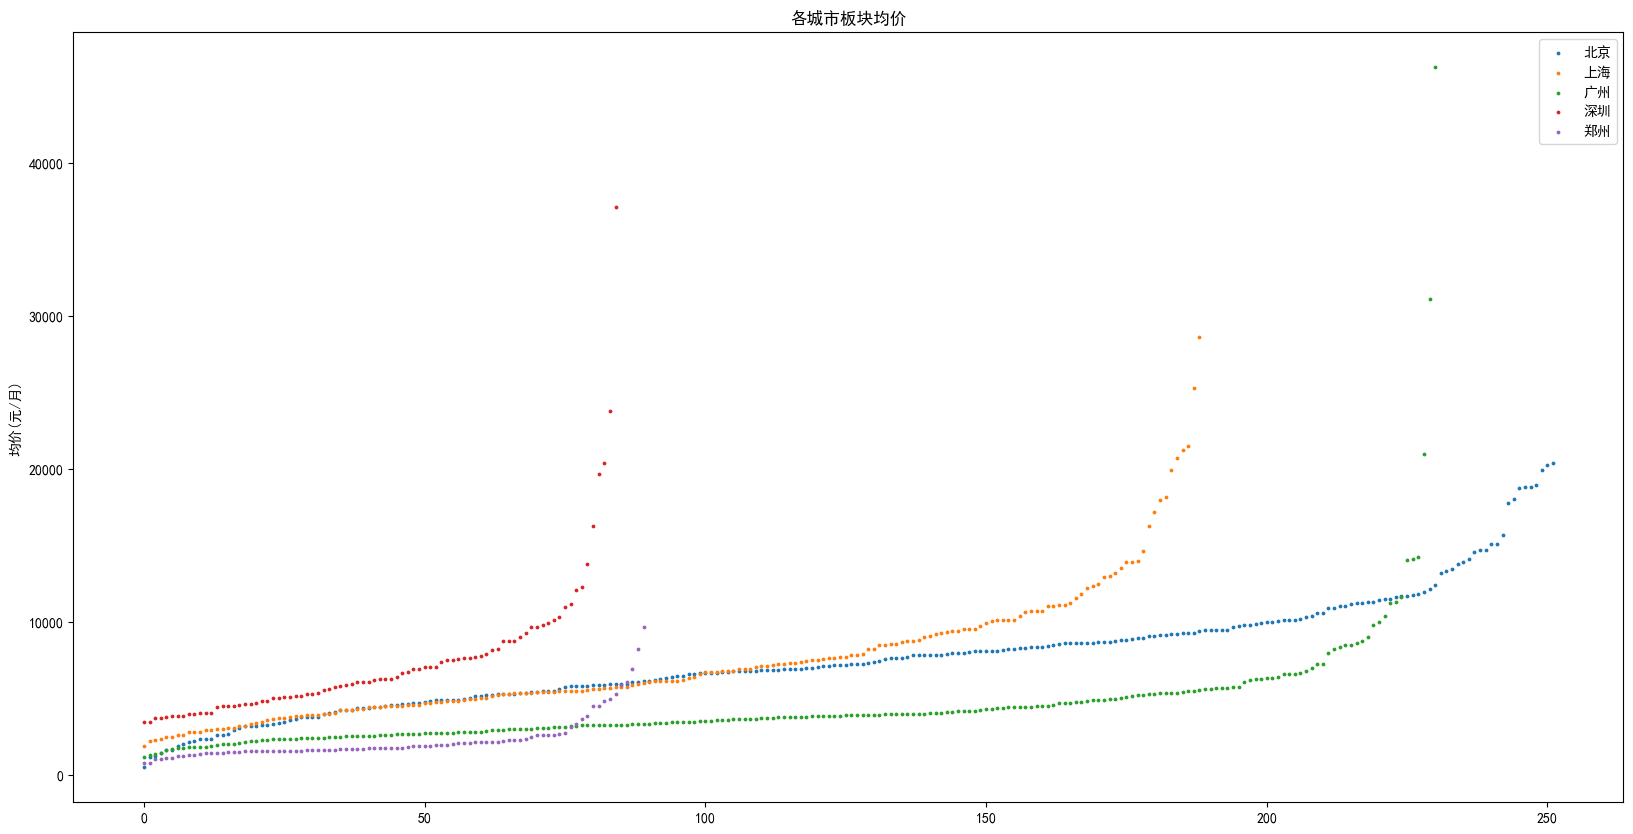

In [29]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,10))
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    plt.scatter(range(len(result[cityname])),result[cityname],label=citynamelist_chinese[i],s=3)
plt.title("各城市板块均价")
plt.ylabel("均价(元/月)")
plt.legend()


In [30]:
#统计每个城市每个block的均价，将板块名和均价存入字典
result={}
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    df=df_list[i]
    block_list=df["block"].unique()
    block_price_list=[]
    for block in block_list:
        block_price_list.append(df[df["block"]==block]["price"].mean())
    result[cityname]=dict(zip(block_list,block_price_list))
print(result)

{'bj': {'安定门': 7562.777777777777, '安贞': 8072.0, '朝阳门外': 11015.08510638298, '朝阳门内': 9965.333333333334, '崇文门': 11040.795918367347, '东单': 12392.307692307691, '东直门': 11291.0, '地安门': 8803.888888888889, '东花市': 9773.262626262625, '东四': 7439.25, '灯市口': 9058.57142857143, '广渠门': 7692.715, '工体': 11605.685483870968, '和平里': 8091.8, '交道口': 8584.827586206897, '建国门外': 11728.282828282829, '建国门内': 13781.935483870968, '金宝街': 10216.5, '六铺炕': 7276.9, '蒲黄榆': 5787.894736842105, '前门': 7811.25, '陶然亭': 7863.206896551724, '天坛': 6793.541666666667, '西罗园': 5416.728260869565, '西单': 15692.608695652174, '永定门': 6777.753623188406, '洋桥': 5626.847619047619, '左安门': 6948.376470588235, '白纸坊': 8129.3835616438355, '菜户营': 7881.082089552238, '长椿街': 9260.375, '车公庄': 11229.573333333334, '德胜门': 10586.982456140351, '阜成门': 8665.640287769784, '广安门': 7973.310502283105, '官园': 13355.038461538461, '金融街': 18020.355263157893, '马甸': 9401.74, '马连道': 7176.805555555556, '木樨地': 9502.462068965517, '牛街': 8257.34677419355, '太平桥': 6828.453608247422,

In [31]:
#将每个城市的block数据输出到表中
# for i in range(len(citynamelist)):
#     cityname=citynamelist[i]
#     df=df_list[i]
#     block_list=df["block"].unique()
#     block_price_list=[]
#     for block in block_list:
#         block_price_list.append(df[df["block"]==block]["price"].mean())
#     result[cityname]=dict(zip(block_list,block_price_list))
#     df=pd.DataFrame(result[cityname].items(),columns=["block","price"])
#     df.to_csv(cityname+"output.csv",encoding='utf-8-sig',index=False)
    

In [32]:
#统计每个城市中每个板块的房源数量
result={}
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    df=df_list[i]
    block_list=df["block"].unique()
    block_num_list=[]
    for block in block_list:
        block_num_list.append(len(df[df["block"]==block]))
    result[cityname]=dict(zip(block_list,block_num_list))
print(result)

{'bj': {'安定门': 18, '安贞': 226, '朝阳门外': 141, '朝阳门内': 90, '崇文门': 196, '东单': 13, '东直门': 30, '地安门': 36, '东花市': 99, '东四': 36, '灯市口': 28, '广渠门': 200, '工体': 124, '和平里': 225, '交道口': 29, '建国门外': 99, '建国门内': 62, '金宝街': 20, '六铺炕': 30, '蒲黄榆': 114, '前门': 24, '陶然亭': 29, '天坛': 48, '西罗园': 92, '西单': 69, '永定门': 138, '洋桥': 105, '左安门': 85, '白纸坊': 73, '菜户营': 134, '长椿街': 112, '车公庄': 75, '德胜门': 57, '阜成门': 139, '广安门': 219, '官园': 78, '金融街': 152, '马甸': 250, '马连道': 144, '木樨地': 145, '牛街': 124, '太平桥': 97, '天宁寺': 82, '西四': 33, '小西天': 219, '宣武门': 99, '西直门': 150, '新街口': 42, '月坛': 211, '右安门内': 97, '奥林匹克公园': 275, '北苑': 381, '北工大': 97, '百子湾': 176, '成寿寺': 136, '常营': 369, 'CBD': 320, '朝青': 442, '朝阳公园': 215, '东坝': 349, '大望路': 296, '东大桥': 183, '大山子': 34, '豆各庄': 189, '定福庄': 228, '方庄': 273, '垡头': 140, '高碑店': 115, '国展': 143, '甘露园': 141, '管庄': 140, '欢乐谷': 121, '惠新西街': 177, '红庙': 177, '华威桥': 144, '健翔桥': 147, '酒仙桥': 294, '劲松': 276, '立水桥': 111, '亮马桥': 121, '牡丹园': 144, '农展馆': 102, '南沙滩': 145, '潘家园': 279, '三元桥': 155, '芍药居': 117, '宋家庄

In [33]:
#统计每个城市中每个板块的房源数量，只保留数量，并除以该城市房源总数
result={}
for i in range(len(citynamelist)):
    cityname=citynamelist[i]
    df=df_list[i]
    block_list=df["block"].unique()
    block_num_list=[]
    for block in block_list:
        block_num_list.append(len(df[df["block"]==block])*1000/len(df))
    result[cityname]=block_num_list
print(result)




{'bj': [0.49344810570754977, 6.195515104994791, 3.8653434947091396, 2.467240528537749, 5.373101595482209, 0.3563791874554526, 0.822413509512583, 0.9868962114150995, 2.7139645813915236, 0.9868962114150995, 0.767585942211744, 5.482756730083886, 3.3993091726520093, 6.168101321344372, 0.7949997258621635, 2.7139645813915236, 1.6996545863260046, 0.5482756730083886, 0.822413509512583, 3.1251713361478153, 0.6579308076100664, 0.7949997258621635, 1.3158616152201328, 2.5220680958385877, 1.8915510718789408, 3.7831021437578816, 2.87844728329404, 2.330171610285652, 2.0012062064806186, 3.6734470091562037, 3.070343768846976, 2.0560337737814574, 1.5625856680739076, 3.810515927408301, 6.0036186194418555, 2.1382751247327154, 4.166895114863753, 6.853445912604858, 3.947584845660398, 3.9749986293108175, 3.3993091726520093, 2.659137014090685, 2.2479302593343933, 0.9046548604638412, 6.0036186194418555, 2.7139645813915236, 4.112067547562915, 1.151378913317616, 5.7843083502385, 2.659137014090685, 7.538790503865

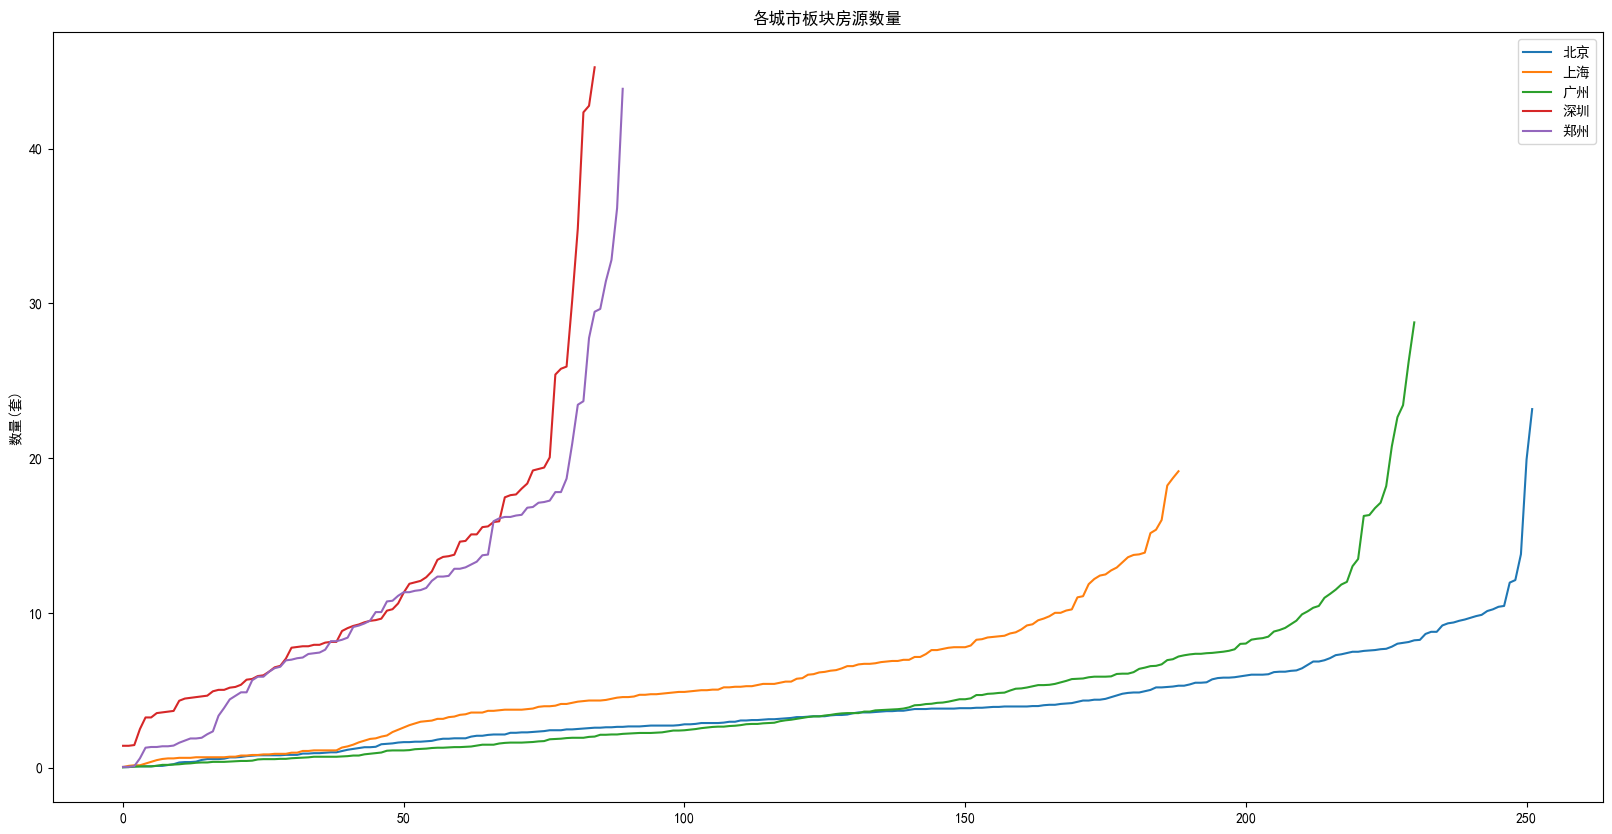

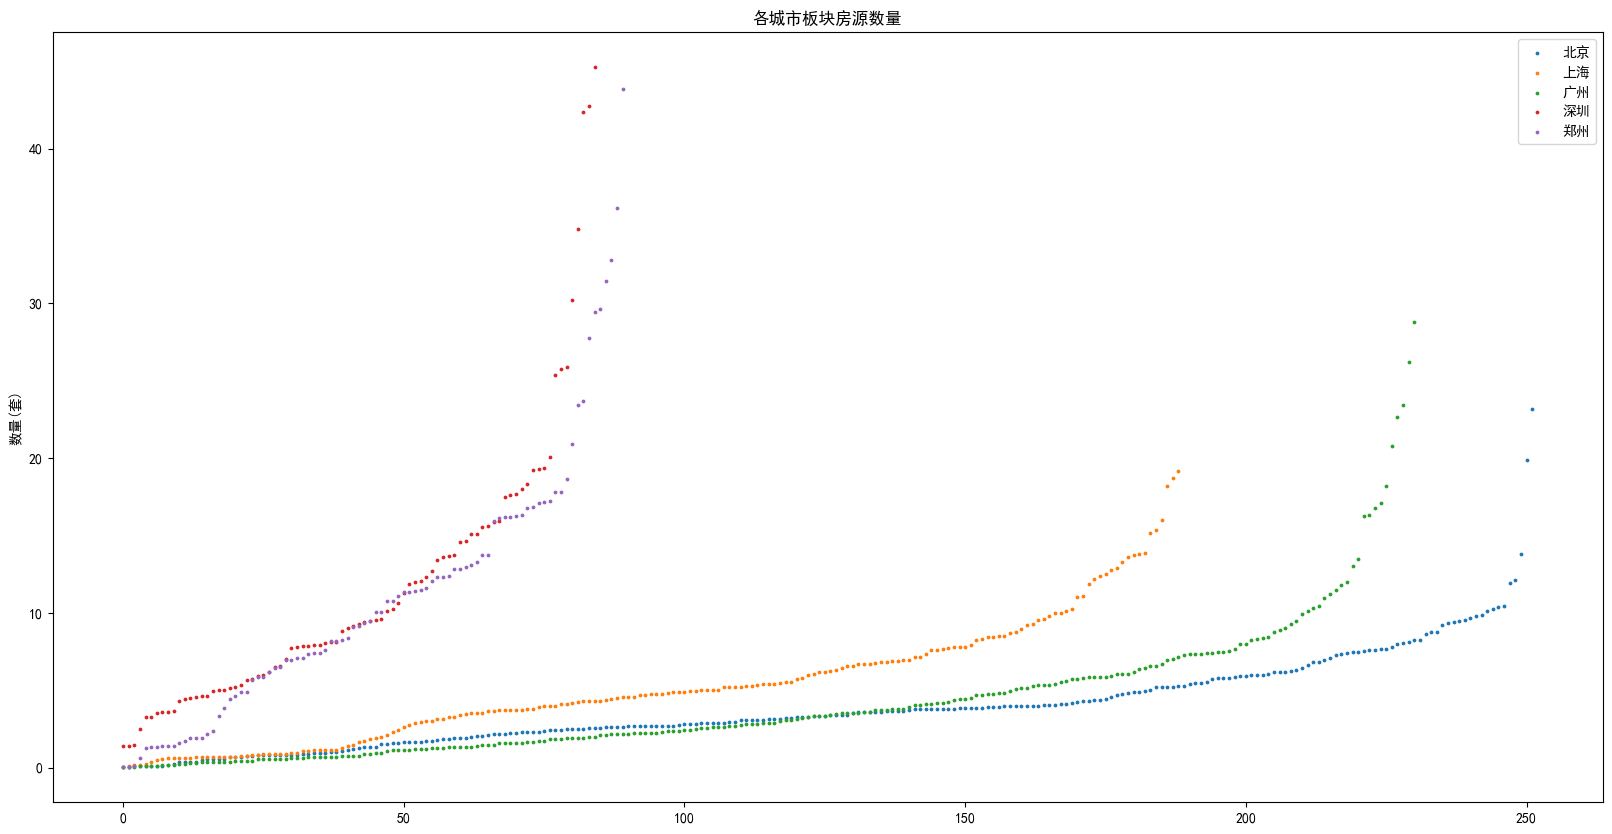

In [37]:
#画图
#把图片设置大点
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len(citynamelist)):
    result[citynamelist[i]]=sorted(result[citynamelist[i]])
    cityname=citynamelist[i]
    plt.plot(result[cityname],label=citynamelist_chinese[i])
plt.title("各城市板块房源数量")
plt.ylabel("数量(套)")
plt.legend()


plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len(citynamelist)):
    #result[citynamelist[i]]=sorted(result[citynamelist[i]])
    cityname=citynamelist[i]
    plt.scatter(range(len(result[cityname])),result[cityname],label=citynamelist_chinese[i],s=3)
plt.title("各城市板块房源数量")
plt.ylabel("数量(套)")
plt.legend()


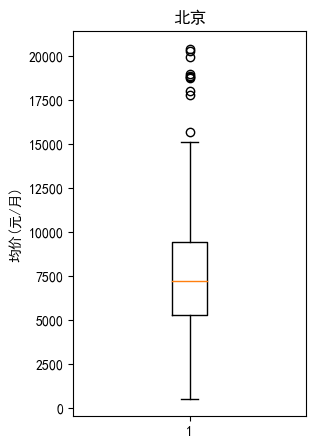

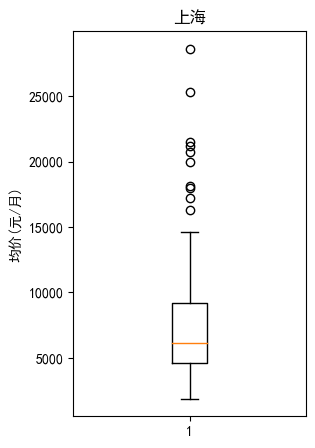

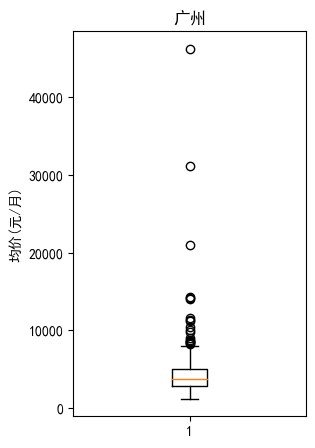

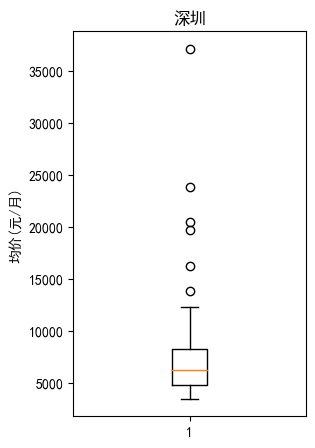

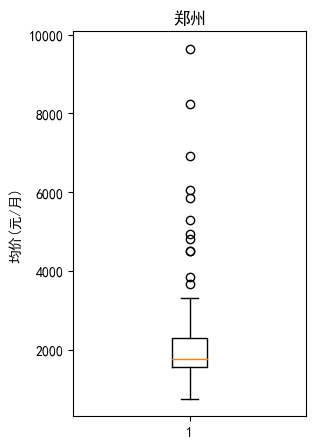

In [35]:
#对每一个城市的板块平均价格绘制箱线图
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len(citynamelist)):
    plt.figure(figsize=(3,5))
    cityname=citynamelist[i]
    df=df_list[i]
    block_list=df["block"].unique()
    block_price_list=[]
    for block in block_list:
        block_price_list.append(df[df["block"]==block]["price"].mean())
    plt.boxplot(block_price_list)
    plt.title(citynamelist_chinese[i])
    plt.ylabel("均价(元/月)")
    plt.show()
